<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/adsr_envelope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [5]:
def w(frequency: float) -> float:
    return 2 * np.pi * frequency

def sine_tone(frequency: int = 440,
              duration: float = 1.0,
              amplitude: float = 0.5,
              sample_rate: int = 44100) -> np.ndarray:
    n_s = int(duration * sample_rate)
    time_points = np.linspace(0, duration, n_s, False)
    sine = np.sin(w(frequency) * time_points)
    sine *= amplitude
    return sine

def plot_signal(signal, start=0, end=5000):
    plt.figure(figsize=(15, 2))
    plt.grid(True)
    plt.plot(signal[start:end])
    plt.show()

my_sound = sine_tone(frequency=220, duration=2.0, amplitude=0.6)
Audio(my_sound, rate=44100)

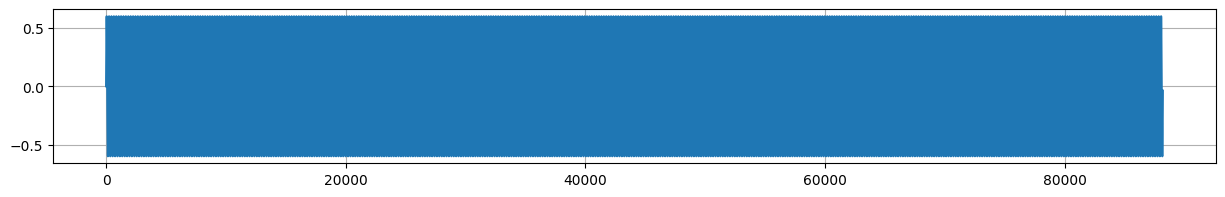

In [10]:
plot_signal(my_sound, end=-1)

In [7]:
def apply_envelope(sound: np.ndarray,
                   adsr: dict,
                   sample_rate: int = 44100) -> np.ndarray:
    sound = sound.copy()
    a_s = int(adsr['attack'] * sample_rate)
    d_s = int(adsr['decay'] * sample_rate)
    r_s = int(adsr['release'] * sample_rate)
    s_s = len(sound) - (a_s + d_s + r_s)

    sound[:a_s] *= np.linspace(0, 1, a_s)
    sound[a_s:a_s + d_s] *= np.linspace(1, adsr['sustain'], d_s)
    sound[a_s + d_s:a_s + d_s + s_s] *= adsr['sustain']
    sound[a_s + d_s + s_s:] *= np.linspace(adsr['sustain'], 0, r_s)

    return sound

adsr = {
    'attack': 0.5,
    'decay': 0.2,
    'sustain': 0.6,
    'release': 0.5,
}

my_sound_adsr = apply_envelope(my_sound, adsr)
Audio(my_sound_adsr, rate=44100)

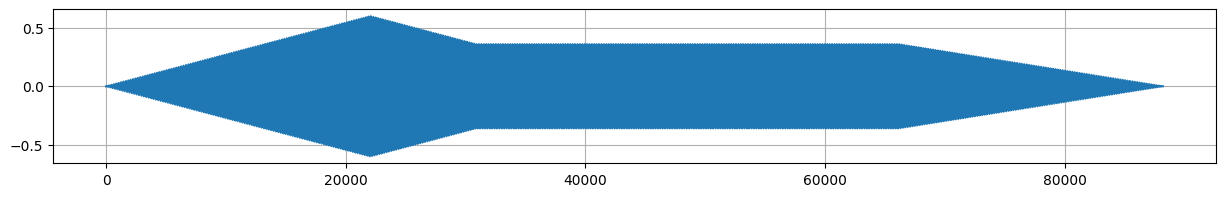

In [9]:
plot_signal(my_sound_adsr, end=-1)